In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm



In [2]:
from pytrends.request import TrendReq
pytrends = TrendReq()
pytrends.build_payload(kw_list=['Saint-maximin'], timeframe='today 5-y')
interest_over_time_df = pytrends.interest_over_time()


TooManyRequestsError: The request failed: Google returned a response with code 429

In [19]:
transfers = pd.read_csv(Path.cwd()/'final-3.csv', index_col=False).drop_duplicates()
transfers

/var/folders/jm/4ddznsn94j7_pznhvk_1rwlw0000gn/T/ipykernel_9432/2977289160.py:1: DtypeWarning: Columns (41,60,82,88,91,101,152,171,193,199,202,212,263,282,304,310,313,323,374,393,415,421,424,434,707,726,748,754,757,767,818,837,859,865,868,878,929,948,970,976,979,989,1040,1059,1081,1087,1090,1100) have mixed types. Specify dtype option on import or set low_memory=False.
  transfers = pd.read_csv(Path.cwd()/'final-3.csv', index_col=False).drop_duplicates()


,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,...,"Touches in box per 90 to, t=4","Weight to, t=4","Yellow cards per 90 to, t=4","Yellow cards to, t=4","xA per 90 to, t=4","xA to, t=4","xG against per 90 to, t=4","xG against to, t=4","xG per 90 to, t=4","xG to, t=4"
0,E. Hazard,28,19/20,England,Premier League,Chelsea,Spain,LaLiga,Real Madrid,summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A. Griezmann,28,19/20,Spain,LaLiga,Atlético Madrid,Spain,LaLiga,Barcelona,summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Philippe Coutinho,27,19/20,Spain,LaLiga,Barcelona,Germany,Bundesliga,Bayern München,summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H. Maguire,26,19/20,England,Premier League,Leicester City,England,Premier League,Manchester United,summer,...,1.23,100.0,0.09,1.0,0.0,0.0,0.0,0.0,0.06,0.61
4,N. Pépé,24,19/20,France,Ligue 1,Lille,England,Premier League,Arsenal,summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,N. Pierozzi,22,23/24,Italy,Serie A,Fiorentina,Italy,Serie A,Salernitana,winter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2465,A. Ibrahimović,30,23/24,Italy,Serie A,Udinese,Italy,Serie A,Frosinone,winter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2466,M. Milovanović,30,23/24,Spain,LaLiga,Getafe,Spain,LaLiga,Almería,winter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2467,J. Justvan,25,23/24,Germany,Bundesliga,Hoffenheim,Germany,Bundesliga,Darmstadt 98,winter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dfs = []
for i in tqdm(range(1, 31)):
    dfs.append(pd.read_excel(Path.cwd()/f'raw_data/Search results-{i}.xlsx'))
    
df = pd.concat(dfs)
    
    

100%|██████████| 30/30 [00:53<00:00,  1.77s/it]


In [11]:
df

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
0,E. Haaland,Manchester City,Manchester City,CF,23,170000000,2027-06-30,15,1448,14,...,NaN,0.06,NaN,NaN,0.06,0.06,0.0,0.00,4,75.0
1,P. Foden,Manchester City,Manchester City,"RAMF, AMF, RW",23,110000000,2027-06-30,20,1780,5,...,NaN,0.20,NaN,NaN,0.35,0.00,0.0,1.01,0,0.0
2,B. Saka,Arsenal,Arsenal,"RWF, RW",22,110000000,2027-06-30,20,1945,6,...,NaN,0.00,NaN,NaN,0.09,0.05,0.0,3.52,2,100.0
3,E. Fernández,Chelsea,Chelsea,"LDMF, LCMF",23,85000000,2031-06-30,18,1531,2,...,NaN,0.41,NaN,NaN,0.41,0.18,0.0,0.94,2,50.0
4,C. Nkunku,Chelsea,Chelsea,"AMF, CF, LCMF",26,80000000,2026-06-30,3,153,1,...,NaN,0.00,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,M. Musacchio,NaN,Milan,RCB,33,0,NaN,29,2788,1,...,NaN,1.39,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
492,I. Abate,NaN,Milan,"RB, RCB",37,0,NaN,19,1392,0,...,NaN,1.03,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
493,B. Cesar,NaN,Chievo,"LCB, CB",41,0,NaN,14,1147,1,...,NaN,1.41,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
494,N. Frey,NaN,Chievo,"RB, RCB, LCB",39,0,NaN,5,241,0,...,NaN,0.75,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0


In [21]:
transfers.columns[transfers.columns.str.contains('t=')].tolist()

['Accelerations per 90, t=-5',
 'Accelerations per 90, t=-5.1',
 'Accurate back passes, %, t=-5',
 'Accurate crosses from left flank, %, t=-5',
 'Accurate crosses from right flank, %, t=-5',
 'Accurate crosses, %, t=-5',
 'Accurate forward passes, %, t=-5',
 'Accurate lateral passes, %, t=-5',
 'Accurate long passes, %, t=-5',
 'Accurate passes to final third, %, t=-5',
 'Accurate passes to penalty area, %, t=-5',
 'Accurate passes, %, t=-5',
 'Accurate progressive passes, %, t=-5',
 'Accurate short / medium passes, %, t=-5',
 'Accurate smart passes, %, t=-5',
 'Accurate through passes, %, t=-5',
 'Aerial duels per 90, t=-5',
 'Aerial duels per 90.1, t=-5',
 'Aerial duels won, %, t=-5',
 'Assists per 90, t=-5',
 'Assists, t=-5',
 'Average long pass length, m, t=-5',
 'Average pass length, m, t=-5',
 'Back passes per 90, t=-5',
 'Back passes received as GK per 90, t=-5',
 'Birth country, t=-5',
 'Clean sheets, t=-5',
 'Conceded goals per 90, t=-5',
 'Conceded goals, t=-5',
 'Corners per

In [22]:
transfers.columns.to_frame().to_csv('ss.csv')

In [23]:
transfers = transfers.dropna(how='all', subset=transfers.columns[transfers.columns.str.contains('t=')].tolist()).reset_index(drop=True)

In [24]:
# cols = ['Player',
#  'Team',
#  'League',
#  'Season',
#  'Name',
#  'Full name',
#  'Age',
#  'Left',
#  'Joined',
#  'Fee',
#  'window',
#  'Wyscout name',
#  'Wyscout Joined',
#  'Wyscout Left',]

# transfers = transfers[transfers.columns[[transfers.columns.str.contains('Joined') | transfers.columns.isin(cols)]]]


<Axes: >

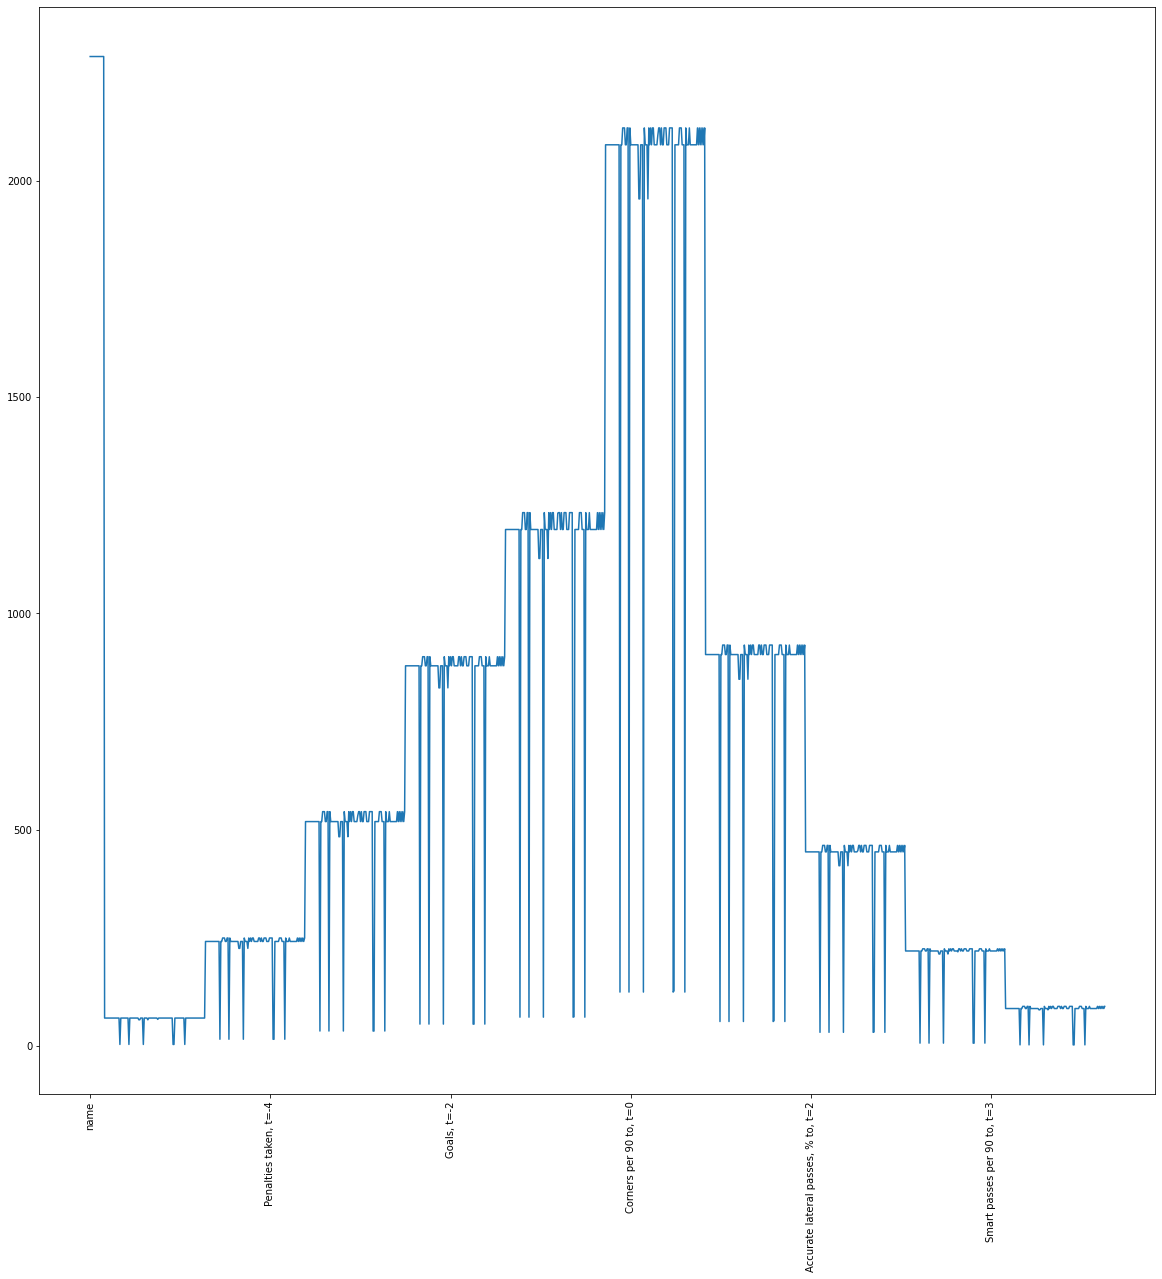

In [25]:
transfers.notna().sum().plot(figsize=(20, 20), kind='line', rot=90)
